In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [2]:
train_data,val_data = tf.keras.utils.image_dataset_from_directory(
    'tomato',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # data_format=None,
    verbose=True,
)

Found 18160 files belonging to 9 classes.
Using 14528 files for training.
Using 3632 files for validation.


In [8]:
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1200,activation='relu'))

model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(units=9,activation='softmax'))

In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history  = model.fit(x = train_data , validation_data = val_data , epochs =10,callbacks=[early_stopping])

Epoch 1/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 414s 899ms/step - accuracy: 0.4842 - loss: 1.4819 - val_accuracy: 0.8037 - val_loss: 0.5698
Epoch 2/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 405s 893ms/step - accuracy: 0.8072 - loss: 0.5444 - val_accuracy: 0.8637 - val_loss: 0.4027
Epoch 3/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 531s 1s/step - accuracy: 0.8751 - loss: 0.3569 - val_accuracy: 0.8874 - val_loss: 0.3469
Epoch 4/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.9100 - loss: 0.2549 - val_accuracy: 0.9091 - val_loss: 0.2794
Epoch 5/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.9349 - loss: 0.1948 - val_accuracy: 0.9133 - val_loss: 0.2666
Epoch 6/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 569s 1s/step - accuracy: 0.9488 - loss: 0.1483 - val_accuracy: 0.9039 - val_loss: 0.2885
Epoch 7/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 665s 1s/step - accuracy: 0.9579 - loss: 0.1256 - val_accuracy: 0.9400 - val_loss: 0.1904
Epoch 8/10
454/454 ━━━━━━━━━━━━━━━━━━━━ 582s 1s/step - accuracy: 0.9606 - loss: 0.1154 - va

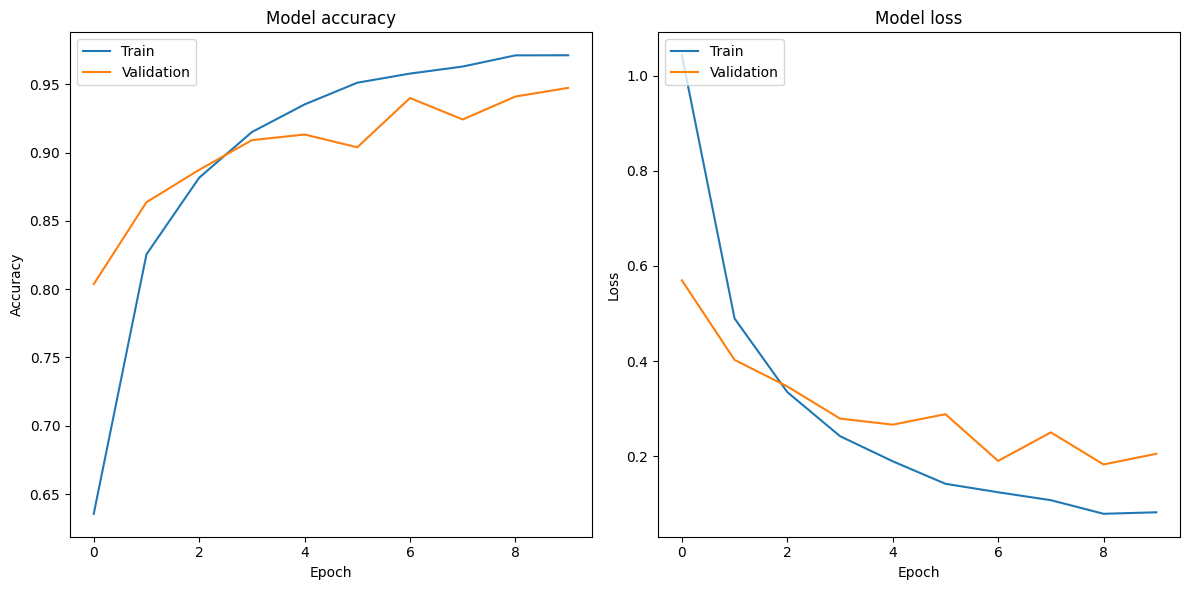

In [12]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()